In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

!pip install contractions

import re
import contractions
from wordcloud import WordCloud

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from gensim.models import word2vec

from textblob import TextBlob

from tqdm import tqdm

from collections import Counter    

import sklearn
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.preprocessing.text import Tokenizer


In [109]:
## importing the data 

xtrain=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv').drop(columns=['keyword','location'],axis=1)
xtest=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv').drop(columns=['keyword','location'],axis=1)
#ytrain=xtrain[['id','target']]
#xtrain=xtrain.drop(columns=['target'],axis=1)
print(xtrain.shape)


(7613, 3)


In [110]:
print(xtrain.shape,xtest.shape)

(7613, 3) (3263, 2)


In [111]:
xtrain.head(50)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
5,8,#RockyFire Update => California Hwy. 20 closed...,1
6,10,#flood #disaster Heavy rain causes flash flood...,1
7,13,I'm on top of the hill and I can see a fire in...,1
8,14,There's an emergency evacuation happening now ...,1
9,15,I'm afraid that the tornado is coming to our a...,1


In [112]:
xtest.head(50)


,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
5,12,We're shaking...It's an earthquake
6,21,They'd probably still show more life than Arse...
7,22,Hey! How are you?
8,27,What a nice hat?
9,29,Fuck off!


<AxesSubplot:>

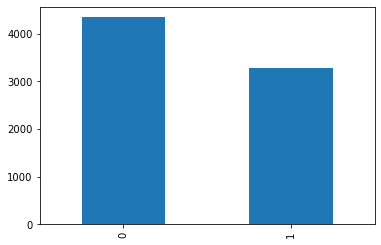

In [113]:
## checking count of disaster tweets

xtrain['target'].value_counts().plot(kind='bar',)

In [114]:
## function to clean the text by removing anything other than useful text from the tweets

def cleantext(inputtxt):
    txt=inputtxt
    txt=txt.lower()
    txt=re.sub(r"https://\S+","",txt)  ##remove links
    txt=re.sub(r'http://\S+','',txt)   ##remove links
    txt=re.sub(r'www.\S+','',txt)      ##remove links
    txt=re.sub(r'\[.*?\]','',txt)      ##remove text  between [...]
    txt=re.sub(r'\(.*?\)','',txt)     ##remove text  between (...)
    txt=re.sub(r'#',' ',txt)          ##remove just #
    txt=re.sub(r'\n', ' ', txt)        ##remove \n
    txt=re.sub(r'@\w+',' ',txt)       ##remove @usernames
    txt=re.sub(r"[^\w\s]","",txt)     ## remove non-alphanumerics any left 
    txt = " ".join([contractions.fix(x) for x in txt.split()])
    txt = re.sub("[''""...“”‘’…]", '', txt)         ##list of quotation marks or ... 
    txt = re.sub('\w*\d\w', '', txt)          ##digits with trailing or preceeding text
    txt = re.compile("["
                               u"\U0001F600-\U0001F64F"  ## emoticons
                               u"\U0001F300-\U0001F5FF"  ## symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  ## transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # #flags (iOS)
                               u"\U00002500-\U00002BEF"  ## chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  ## dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE).sub(r'', txt) ##emojis and symbols
    return txt

In [115]:
xtrain['text'] = xtrain['text'].apply(lambda x: cleantext(str(x)))

In [116]:
xtrain['text'].loc[:50]


0     our deeds are the reason of this earthquake ma...
1                 forest fire near la ronge sask canada
2     all residents asked to shelter in place are be...
3      people receive wildfires evacuation orders in...
4     just got sent this photo from ruby alaska as s...
5     rockyfire update california hwy  closed in bot...
6     flood disaster heavy rain causes flash floodin...
7     i am on top of the hill and i can see a fire i...
8     there is an emergency evacuation happening now...
9     i am afraid that the tornado is coming to our ...
10          three people died from the heat wave so far
11    haha south tampa is getting flooded hah wait a...
12    raining flooding florida tampabay tampa  or  d...
13                flood in bago myanmar we arrived bago
14    damage to school bus on  in multi car crash br...
15                                       what is up man
16                                        i love fruits
17                                     summer is

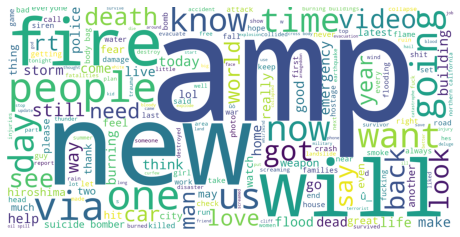

In [117]:
## creating wordclouds from the tweets, it has a lot of stop words which need to be removed

wc = " ".join(xtrain["text"].astype(str).tolist())

wordcloud = WordCloud(width = 2000, height = 1000, background_color ='white', min_font_size = 1).generate(wc)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

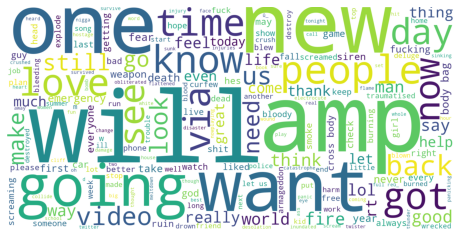

In [118]:
wc = " ".join(xtrain[xtrain['target']==0]["text"].astype(str).tolist())

wordcloud = WordCloud(width = 2000, height = 1000, background_color ='white', min_font_size = 1).generate(wc)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

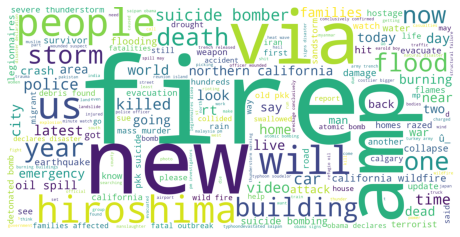

In [119]:
wc = " ".join(xtrain[xtrain['target']==1]["text"].astype(str).tolist())

wordcloud = WordCloud(width = 2000, height = 1000, background_color ='white', min_font_size = 1).generate(wc)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

In [120]:
## chekcing for na values in the data

print(xtrain.isna().sum().to_string())
print(xtest.isna().sum().to_string())

id        0
text      0
target    0
id      0
text    0


In [121]:
## text cleaning

stops = set(stopwords.words('english'))                  ## making list of stopwords
lemmatizer = WordNetLemmatizer()                         ## calling lemmatizer instance
                                    

def get_wordnet_pos(word):                               ## part of speech tagging and mapping for input in lemmatizer
    
    treebank_tag = nltk.pos_tag([word])[0][1]
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def correct_text(text, lemma=False, spell=False):      ## function to correct text by lemmatization and spelling check
   
    sample = text
    
    #removing stopwords
    sample = sample.lower()
    sample = [word for word in sample.split() if not word in stops]
    sample = ' '.join(sample)
    
    if lemma:
        sample = sample.split()
        sample = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in sample]
        sample = ' '.join(sample)
        
    
    if spell:
        sample = str(TextBlob(text).correct())
    
    return sample

In [122]:
## applying the text cleaning lemmatization and spell check

xtrain['correct_text'] = 'text'
for ind,text in enumerate(tqdm(xtrain['text'])):
    xtrain['correct_text'][ind] = correct_text(text, lemma=True,spell=False)


  0%|          | 0/7613 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
100%|██████████| 7613/7613 [00:19<00:00, 398.00it/s]


In [123]:
## creating vocabulary(dictionary of words and their counts) for data to maybe save or resuse or text analysis for future use 

def build_vocab(vocab_obj, text):
    sample = text
    tokens = [word for word in sample.split()]
    vocab_obj.update(tokens)
    
vocab = Counter()
for text in xtrain['correct_text']:
    build_vocab(vocab, text)

print(vocab.most_common(20))

[('get', 433), ('like', 392), ('fire', 359), ('go', 319), ('amp', 295), ('new', 225), ('via', 217), ('people', 214), ('one', 201), ('say', 197), ('u', 196), ('news', 193), ('kill', 174), ('make', 170), ('flood', 167), ('come', 160), ('video', 159), ('emergency', 158), ('time', 157), ('would', 157)]


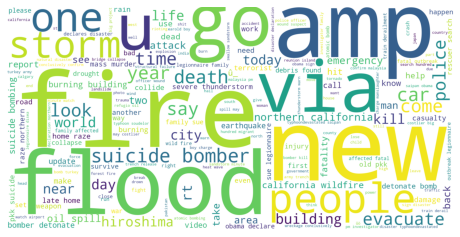

In [124]:
## cleaned text with no stop words

wc = " ".join(xtrain[xtrain['target']==1]["correct_text"].astype(str).tolist())

wordcloud = WordCloud(width = 2000, height = 1000, background_color ='white', min_font_size = 1).generate(wc)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

In [125]:
## tokenize the document

def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

## giving each word a unique number and padding the document with zero so that each have same length

def encode_docs(tokenizer, max_length, docs):
    encoded = tokenizer.texts_to_sequences(docs)
    
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    
    return padded

##  define the model neural network

def define_model(vocab_size, max_length, num_words):
    model = Sequential()
    model.add(Embedding(vocab_size, 6, input_length=max_length))                ########converting the numbers into vector of size 6
    model.add(Flatten(input_shape=(num_words,)))                                 ########reshaping into num_words,1
    model.add(Dense(45, activation='relu'))                                      
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(0.0001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    return model

In [126]:
xtr,xte , ytr, yte = train_test_split(xtrain['correct_text'], xtrain['target'], test_size=0.33, random_state=101)

In [127]:
vocab_set = set([x for x in vocab if len(x)>2])

tokenizer = create_tokenizer(xtr.values)
vocab_size = len(tokenizer.word_index) + 1
max_length = max([len(samp.split()) for samp in xtr])

In [128]:
x_train = encode_docs(tokenizer, max_length, xtr.values)
x_test = encode_docs(tokenizer, max_length, xte.values)

In [129]:
clf_model = define_model(vocab_size, max_length, x_train.shape[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 23, 6)             59400     
_________________________________________________________________
flatten_5 (Flatten)          (None, 138)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 45)                6255      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 46        
Total params: 65,701
Trainable params: 65,701
Non-trainable params: 0
_________________________________________________________________


In [130]:
clf_model.fit(x_train, ytr.values, epochs=25, verbose=2, batch_size=50)

Epoch 1/25
102/102 - 1s - loss: 0.6901 - accuracy: 0.5518
Epoch 2/25
102/102 - 0s - loss: 0.6833 - accuracy: 0.5637
Epoch 3/25
102/102 - 0s - loss: 0.6786 - accuracy: 0.5633
Epoch 4/25
102/102 - 0s - loss: 0.6738 - accuracy: 0.5637
Epoch 5/25
102/102 - 0s - loss: 0.6664 - accuracy: 0.5704
Epoch 6/25
102/102 - 0s - loss: 0.6546 - accuracy: 0.6114
Epoch 7/25
102/102 - 0s - loss: 0.6366 - accuracy: 0.6835
Epoch 8/25
102/102 - 0s - loss: 0.6117 - accuracy: 0.7531
Epoch 9/25
102/102 - 0s - loss: 0.5802 - accuracy: 0.7878
Epoch 10/25
102/102 - 0s - loss: 0.5430 - accuracy: 0.8155
Epoch 11/25
102/102 - 0s - loss: 0.5033 - accuracy: 0.8324
Epoch 12/25
102/102 - 0s - loss: 0.4626 - accuracy: 0.8539
Epoch 13/25
102/102 - 0s - loss: 0.4236 - accuracy: 0.8690
Epoch 14/25
102/102 - 0s - loss: 0.3876 - accuracy: 0.8808
Epoch 15/25
102/102 - 0s - loss: 0.3553 - accuracy: 0.8904
Epoch 16/25
102/102 - 0s - loss: 0.3259 - accuracy: 0.9024
Epoch 17/25
102/102 - 0s - loss: 0.2997 - accuracy: 0.9110
Epoch 

In [131]:
clf_model.evaluate(x_test, yte, verbose=0)[1]

0.7942698001861572

In [132]:
def predict_sentiment(text, vocab=vocab_set, tokenizer=tokenizer, max_length=max_length, model=clf_model):
    line = text
    # clean review
    line = cleantext(line)
    line = correct_text(line)
    line = " ".join([word for word in line.split() if word in vocab])
    # encode and pad review
    padded = encode_docs(tokenizer, max_length, [line])
    # predict sentiment
    yhat = model.predict(padded, verbose=0)
#    print(yhat)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
#    if round(percent_pos) == 0:
#        return (1-percent_pos), 'NEGATIVE'
#    else:
#        return percent_pos, 'POSITIVE'
    return round(percent_pos)

In [133]:
xtest['target']=0.0
for ind,inputxt in enumerate(xtest['text']):
    xtest['target'][ind] = predict_sentiment(inputxt, vocab_set, tokenizer, max_length, clf_model)
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
xtest

,id,text,target
0,0,Just happened a terrible car crash,0.0
1,2,"Heard about #earthquake is different cities, s...",0.0
2,3,"there is a forest fire at spot pond, geese are...",1.0
3,9,Apocalypse lighting. #Spokane #wildfires,0.0
4,11,Typhoon Soudelor kills 28 in China and Taiwan,1.0
...,...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1.0
3259,10865,Storm in RI worse than last hurricane. My city...,1.0
3260,10868,Green Line derailment in Chicago http://t.co/U...,1.0
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...,1.0


In [135]:
yfinal=pd.DataFrame(xtest[['id','target']])

In [136]:
print(yfinal.shape)


(3263, 2)


In [137]:
yfinal

,id,target
0,0,0.0
1,2,0.0
2,3,1.0
3,9,0.0
4,11,1.0
...,...,...
3258,10861,1.0
3259,10865,1.0
3260,10868,1.0
3261,10874,1.0


In [138]:
yfinal.to_csv('out.csv',index=False)